<a href="https://colab.research.google.com/github/FahruddinZaimIbrahim/PCVK_Ganjil_2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


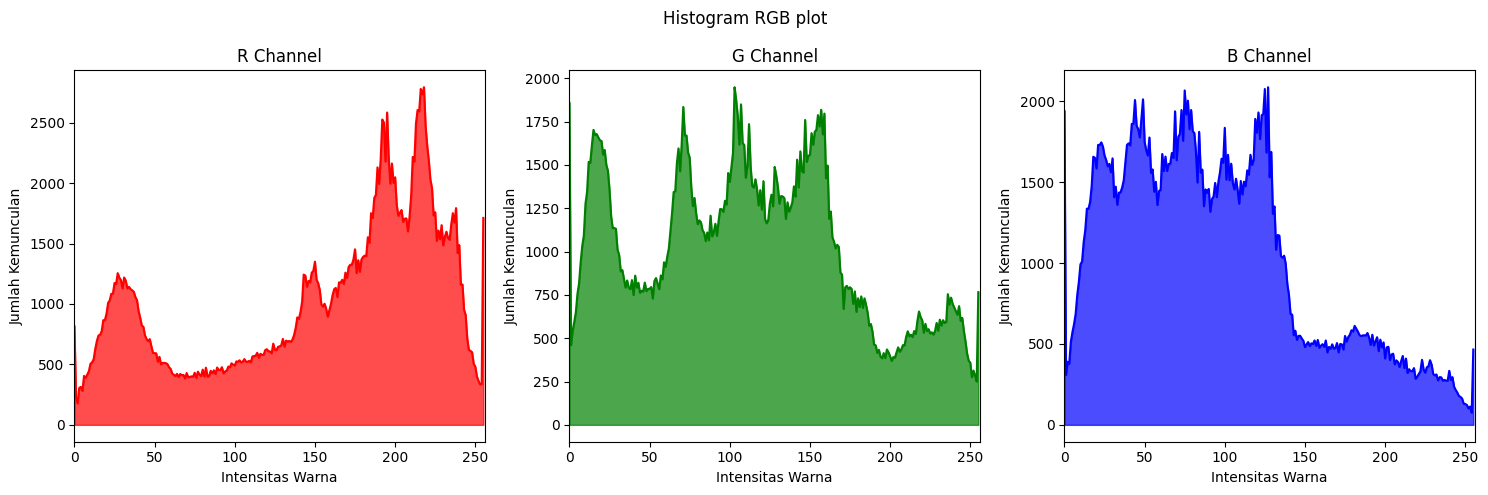

In [7]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

# Baca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Konversi BGR ke RGB

# Hitung histogram untuk setiap channel
color = ('r', 'g', 'b')
plt.figure(figsize=(15, 5))
plt.suptitle('Histogram RGB plot')

for i, col in enumerate(color):
    histr = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.subplot(1, 3, i+1)
    plt.plot(histr, color=col)
    plt.fill_between(range(256), histr.reshape(-1), 0, color=col, alpha=0.7)
    plt.xlim([0, 256])
    plt.title(f'{col.upper()} Channel')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.show()

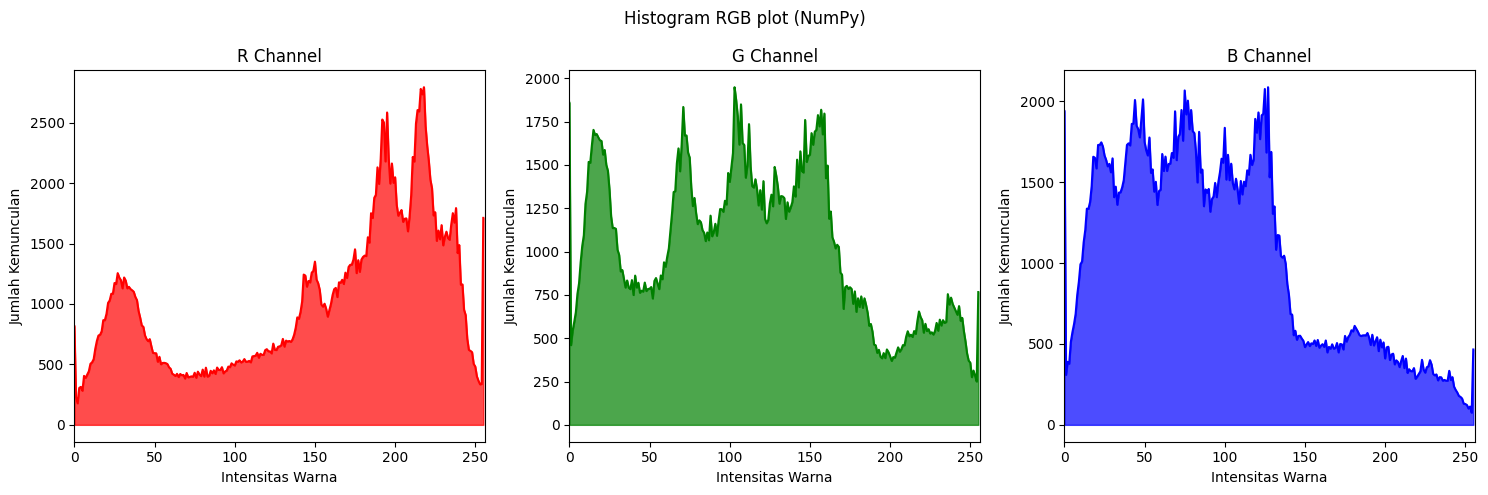

In [ ]:
# Baca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Hitung histogram menggunakan NumPy
color = ('r', 'g', 'b')
plt.figure(figsize=(15, 5))
plt.suptitle('Histogram RGB plot (NumPy)')

for i, col in enumerate(color):
    hist, bins = np.histogram(img[:,:,i], bins=256, range=[0, 256])
    plt.subplot(1, 3, i+1)
    plt.plot(bins[:-1], hist, color=col)
    plt.fill_between(bins[:-1], hist, 0, color=col, alpha=0.7)
    plt.xlim([0, 256])
    plt.title(f'{col.upper()} Channel')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.show()

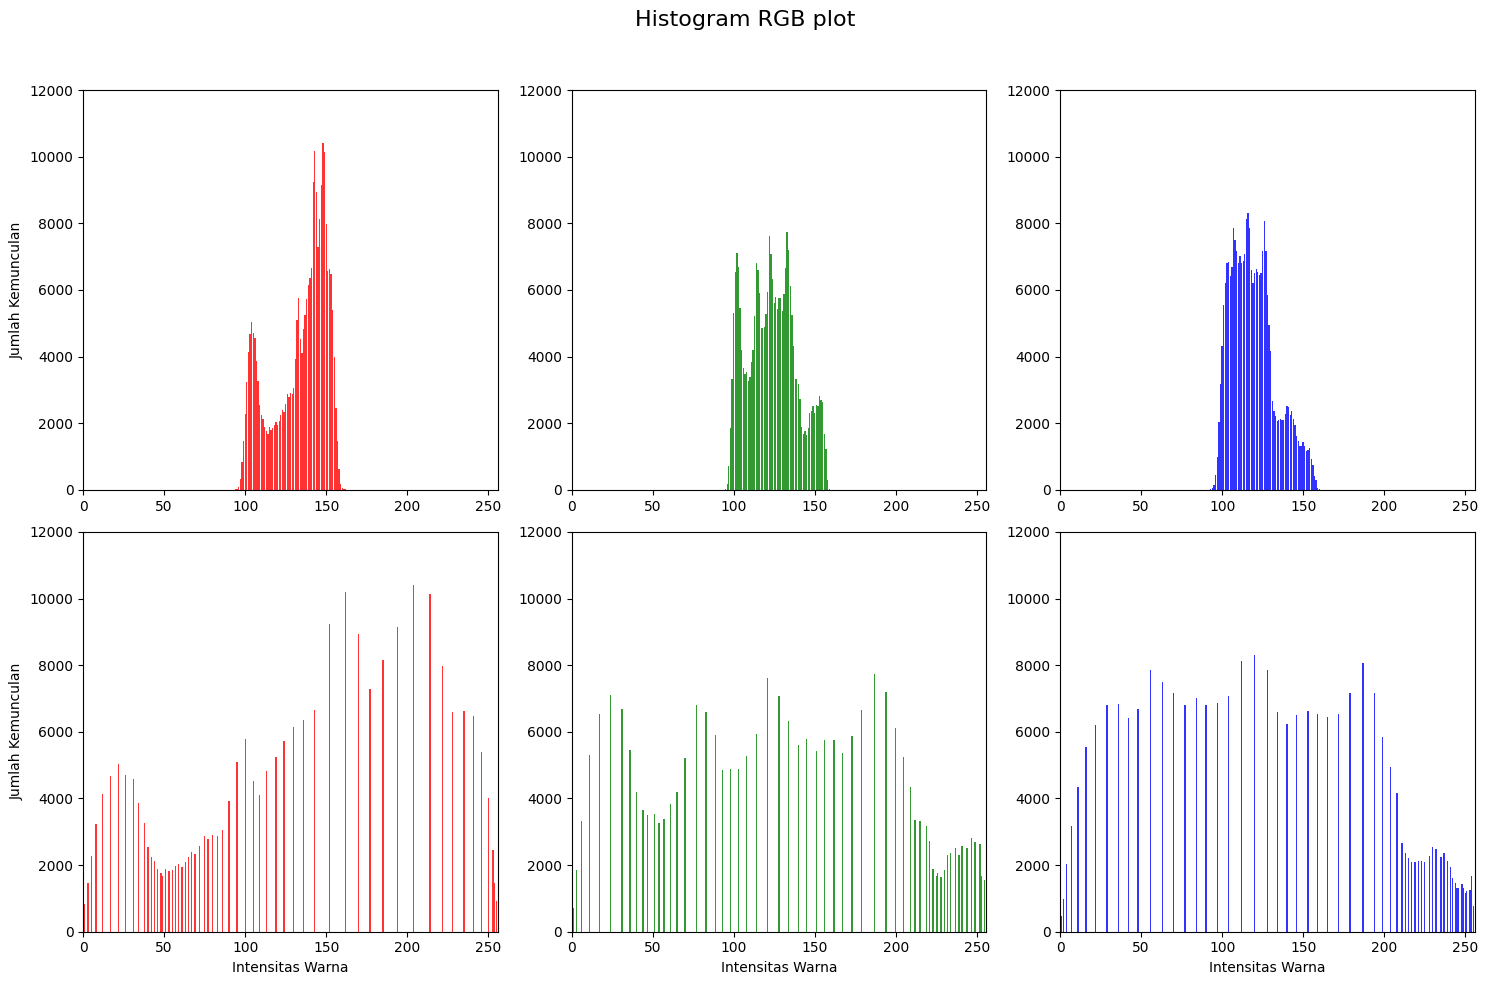

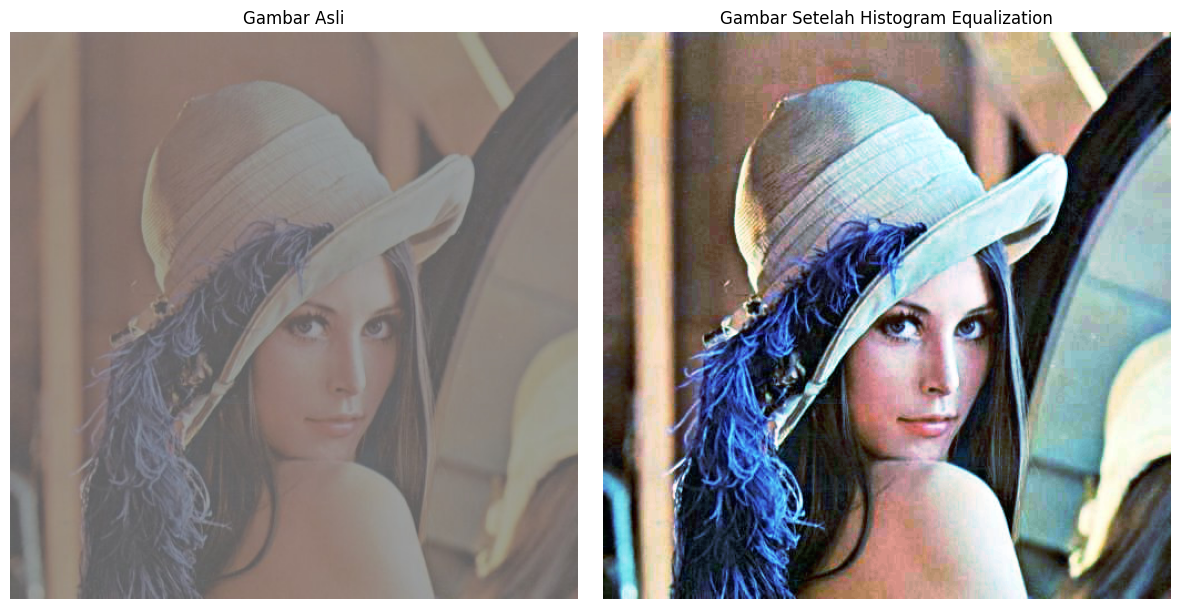

In [ ]:
def histogram_equalization(img):
    # Equalisasi histogram untuk setiap channel
    img_eq = np.zeros_like(img)
    for i in range(3):
        img_eq[:,:,i] = cv.equalizeHist(img[:,:,i])
    return img_eq

def plot_histogram(img, axes, row):
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist = cv.calcHist([img], [i], None, [256], [0, 256])
        axes[row, i].bar(range(256), hist.ravel(), color=color, alpha=0.8)
        axes[row, i].set_xlim([0, 256])
        axes[row, i].set_ylim([0, 12000])  # Sesuaikan dengan data Anda
        if row == 1:
            axes[row, i].set_xlabel('Intensitas Warna')
        if i == 0:
            axes[row, i].set_ylabel('Jumlah Kemunculan')

# Baca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Terapkan histogram equalization
img_eq = histogram_equalization(img)

# Buat plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
plt.suptitle('Histogram RGB plot', fontsize=16)

# Plot histogram asli
plot_histogram(img, axes, 0)

# Plot histogram setelah equalization
plot_histogram(img_eq, axes, 1)

# Hapus label sumbu y yang tidak perlu
for ax in axes[:, 1:].flatten():
    ax.set_ylabel('')

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Memberikan ruang untuk judul utama
plt.show()

# Tampilkan gambar asli dan hasil equalization
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_eq)
plt.title('Gambar Setelah Histogram Equalization')
plt.axis('off')

plt.tight_layout()
plt.show()

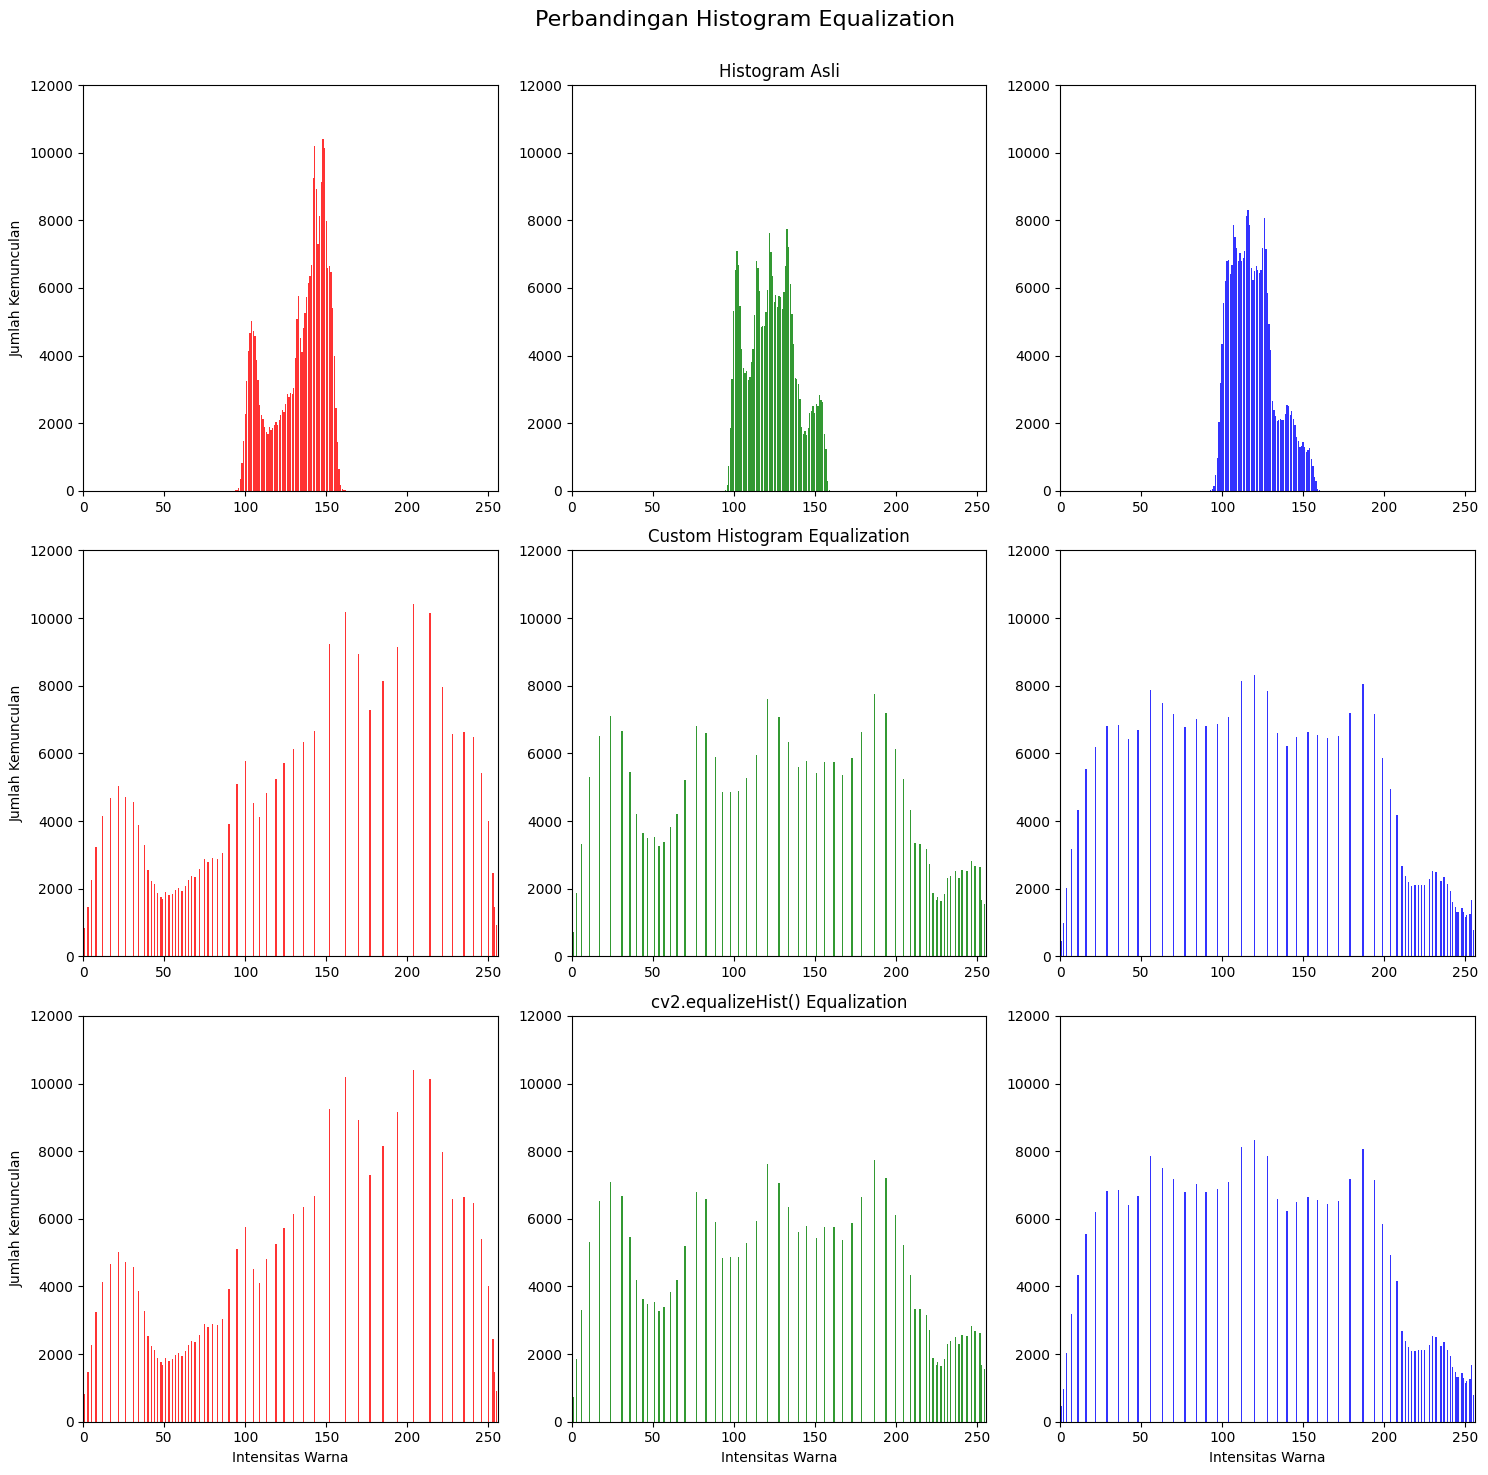

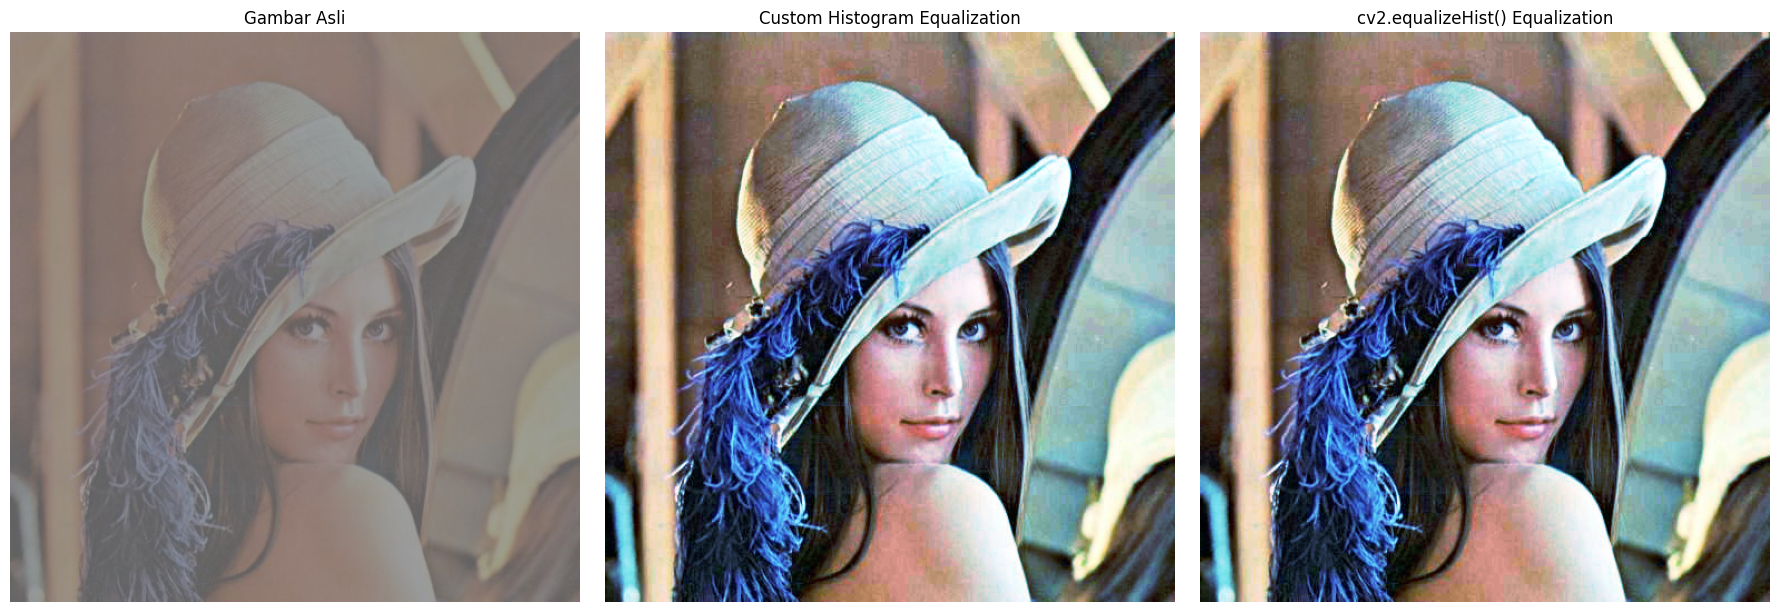

In [ ]:
def custom_histogram_equalization(img):
    img_eq = np.zeros_like(img)
    for i in range(3):
        img_eq[:,:,i] = cv.equalizeHist(img[:,:,i])
    return img_eq

def plot_histogram(img, axes, row, title):
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist = cv.calcHist([img], [i], None, [256], [0, 256])
        axes[row, i].bar(range(256), hist.ravel(), color=color, alpha=0.8)
        axes[row, i].set_xlim([0, 256])
        axes[row, i].set_ylim([0, 12000])
        if row == 2:
            axes[row, i].set_xlabel('Intensitas Warna')
        if i == 0:
            axes[row, i].set_ylabel('Jumlah Kemunculan')
    axes[row, 1].set_title(title)

# Metode 1: Custom histogram equalization
img_eq_custom = custom_histogram_equalization(img)

# Metode 2: cv2.equalizeHist()
img_eq_cv2 = cv.merge([cv.equalizeHist(img[:,:,i]) for i in range(3)])

# Buat plot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
plt.suptitle('Perbandingan Histogram Equalization', fontsize=16)

# Plot histogram asli
plot_histogram(img, axes, 0, 'Histogram Asli')

# Plot histogram setelah custom equalization
plot_histogram(img_eq_custom, axes, 1, 'Custom Histogram Equalization')

# Plot histogram setelah cv2.equalizeHist()
plot_histogram(img_eq_cv2, axes, 2, 'cv2.equalizeHist() Equalization')

# Hapus label sumbu y yang tidak perlu
for ax in axes[:, 1:].flatten():
    ax.set_ylabel('')

plt.tight_layout()
plt.subplots_adjust(top=0.93)

# Tampilkan gambar asli dan hasil equalization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(img)
axes[0].set_title('Gambar Asli')
axes[0].axis('off')

axes[1].imshow(img_eq_custom)
axes[1].set_title('Custom Histogram Equalization')
axes[1].axis('off')

axes[2].imshow(img_eq_cv2)
axes[2].set_title('cv2.equalizeHist() Equalization')
axes[2].axis('off')

plt.tight_layout()
plt.show()

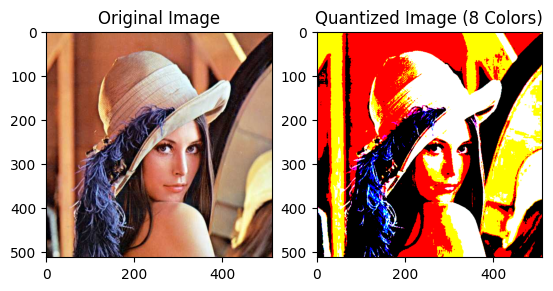

In [8]:
# Load gambar lena
image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Convert BGR to RGB

# Definisikan 8 warna dasar (Hitam, Merah, Hijau, Kuning, Biru, Cyan, Magenta, Putih)
colors = {
    'black': [0, 0, 0],
    'red': [255, 0, 0],
    'green': [0, 255, 0],
    'yellow': [255, 255, 0],
    'blue': [0, 0, 255],
    'cyan': [0, 255, 255],
    'magenta': [255, 0, 255],
    'white': [255, 255, 255]
}

# Fungsi untuk memetakan setiap piksel ke warna terdekat
def find_nearest_color(pixel):
    colors_values = np.array(list(colors.values()))
    distances = np.sqrt(np.sum((colors_values - pixel) ** 2, axis=1))
    return colors_values[np.argmin(distances)]

# Lakukan pemetaan pada gambar
quantized_image = np.zeros_like(image)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        quantized_image[i, j] = find_nearest_color(image[i, j])

# Tampilkan hasil
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(quantized_image)
plt.title('Quantized Image (8 Colors)')

plt.show()

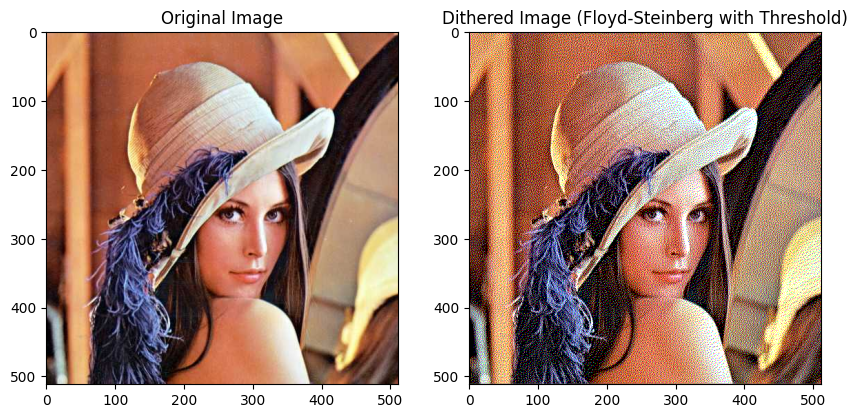

In [28]:
# Load gambar
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

# Mendapatkan dimensi gambar
height, width, _ = img.shape

# Mengambil setiap channel warna (B, G, R)
imgPixelBlue = img[:, :, 0].astype(float)
imgPixelGreen = img[:, :, 1].astype(float)
imgPixelRed = img[:, :, 2].astype(float)

# Jarak antara piksel (kita akan gunakan 1 sebagai minimal jarak)
jarakPixel = 1

# Function untuk thresholding (memastikan nilai tidak keluar dari batas 0-255)
def threshold(val):
    return min(255, max(0, val))

# Looping untuk setiap piksel dalam gambar
for y in range(height-1):
    for x in range(1, width-1):
        # Ambil nilai piksel asli
        pixelBlueOld = imgPixelBlue[y, x]
        pixelGreenOld = imgPixelGreen[y, x]
        pixelRedOld = imgPixelRed[y, x]

        # Hitung piksel baru berdasarkan jarak dan batas warna
        pixelBlueNew = np.round(jarakPixel * pixelBlueOld / 255.0) * (255.0 / jarakPixel)
        pixelGreenNew = np.round(jarakPixel * pixelGreenOld / 255.0) * (255.0 / jarakPixel)
        pixelRedNew = np.round(jarakPixel * pixelRedOld / 255.0) * (255.0 / jarakPixel)

        # Simpan nilai piksel baru
        imgPixelBlue[y, x] = pixelBlueNew
        imgPixelGreen[y, x] = pixelGreenNew
        imgPixelRed[y, x] = pixelRedNew

        # Hitung kuantitasi error
        errorBlue = pixelBlueOld - pixelBlueNew
        errorGreen = pixelGreenOld - pixelGreenNew
        errorRed = pixelRedOld - pixelRedNew

        # Sebarkan error ke piksel tetangga menggunakan aturan Floyd-Steinberg
        if x + 1 < width:
            imgPixelBlue[y, x+1] = threshold(imgPixelBlue[y, x+1] + errorBlue * 7 / 16)
            imgPixelGreen[y, x+1] = threshold(imgPixelGreen[y, x+1] + errorGreen * 7 / 16)
            imgPixelRed[y, x+1] = threshold(imgPixelRed[y, x+1] + errorRed * 7 / 16)

        if y + 1 < height and x - 1 >= 0:
            imgPixelBlue[y+1, x-1] = threshold(imgPixelBlue[y+1, x-1] + errorBlue * 3 / 16)
            imgPixelGreen[y+1, x-1] = threshold(imgPixelGreen[y+1, x-1] + errorGreen * 3 / 16)
            imgPixelRed[y+1, x-1] = threshold(imgPixelRed[y+1, x-1] + errorRed * 3 / 16)

        if y + 1 < height:
            imgPixelBlue[y+1, x] = threshold(imgPixelBlue[y+1, x] + errorBlue * 5 / 16)
            imgPixelGreen[y+1, x] = threshold(imgPixelGreen[y+1, x] + errorGreen * 5 / 16)
            imgPixelRed[y+1, x] = threshold(imgPixelRed[y+1, x] + errorRed * 5 / 16)

        if y + 1 < height and x + 1 < width:
            imgPixelBlue[y+1, x+1] = threshold(imgPixelBlue[y+1, x+1] + errorBlue * 1 / 16)
            imgPixelGreen[y+1, x+1] = threshold(imgPixelGreen[y+1, x+1] + errorGreen * 1 / 16)
            imgPixelRed[y+1, x+1] = threshold(imgPixelRed[y+1, x+1] + errorRed * 1 / 16)

# Rekonstruksi gambar dari channel yang sudah diproses
dithered_image = cv.merge([imgPixelBlue.astype(np.uint8), imgPixelGreen.astype(np.uint8), imgPixelRed.astype(np.uint8)])

# Tampilkan gambar asli dan hasil dithering
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img.astype(np.uint8), cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(dithered_image, cv.COLOR_BGR2RGB))
plt.title('Dithered Image (Floyd-Steinberg with Threshold)')

plt.show()


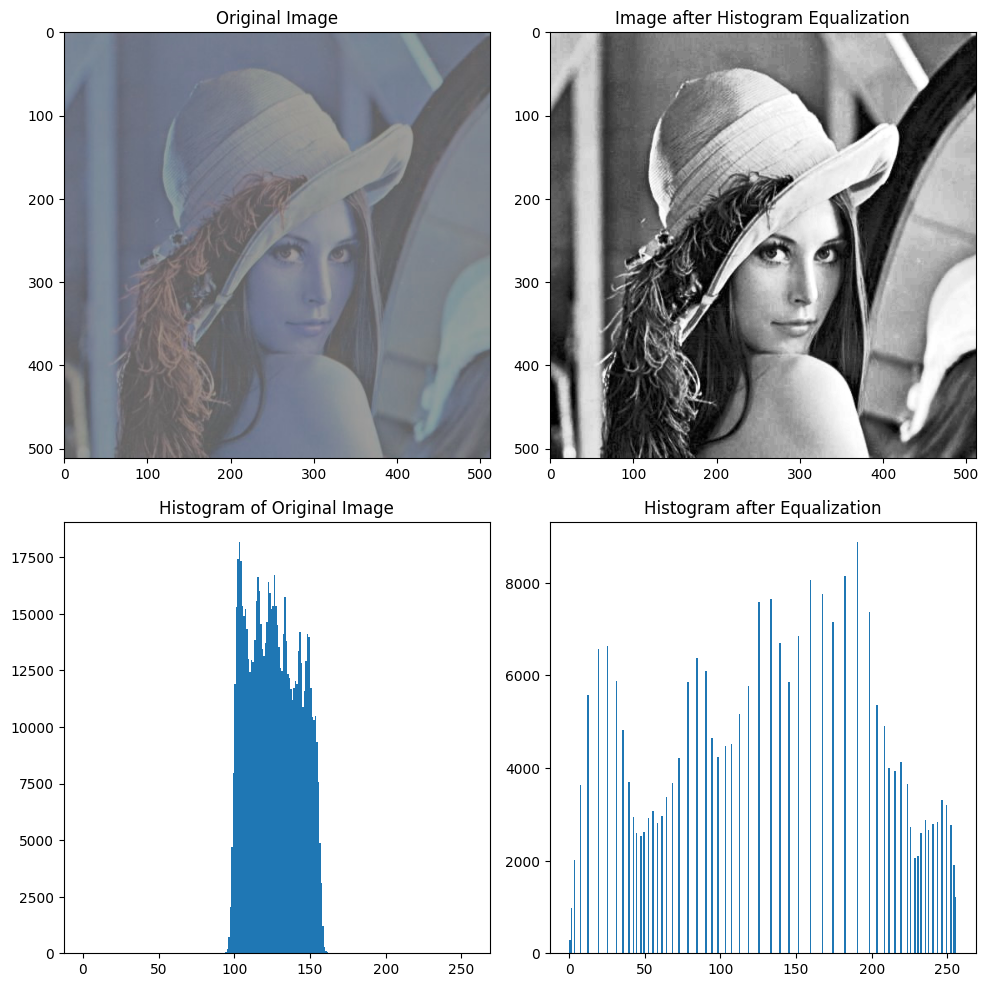

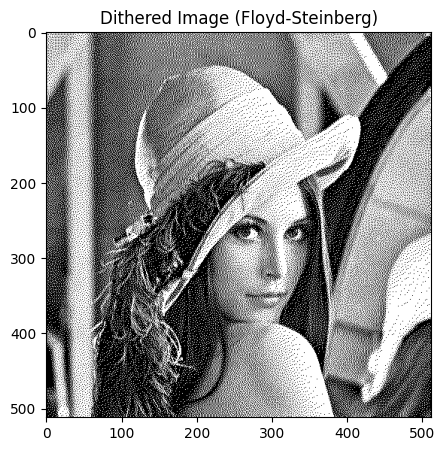

In [35]:
# Load gambar lena_lc dalam mode grayscale
image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

# Step 1: Histogram Equalization
equalized_image = cv.equalizeHist(cv.cvtColor(image, cv.COLOR_BGR2GRAY))

# Step 2: Floyd-Steinberg Dithering
def floyd_steinberg_dithering(image):
    # Ensures the image is converted to grayscale before processing.
    # image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    # Convert the image to float for further processing.
    img_dithered = image.astype(float)
    rows, cols = img_dithered.shape

    for y in range(rows):
        for x in range(cols):
            old_pixel = img_dithered[y, x]
            new_pixel = np.round(old_pixel / 255) * 255  # Kuantisasi
            img_dithered[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            # Sebarkan kesalahan kuantisasi ke piksel tetangga dengan threshold
            if x + 1 < cols:
                img_dithered[y, x + 1] += quant_error * 7 / 16
            if x - 1 >= 0 and y + 1 < rows:
                img_dithered[y + 1, x - 1] += quant_error * 3 / 16
            if y + 1 < rows:
                img_dithered[y + 1, x] += quant_error * 5 / 16
            if x + 1 < cols and y + 1 < rows:
                img_dithered[y + 1, x + 1] += quant_error * 1 / 16

            # Penerapan threshold
            img_dithered[y, x] = min(255, max(0, img_dithered[y, x]))

    return img_dithered.astype(np.uint8)

# Terapkan Floyd-Steinberg dithering pada gambar yang sudah di-equalize
dithered_image = floyd_steinberg_dithering(equalized_image)

# Plot hasil
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Gambar asli (grayscale)
axs[0, 0].imshow(image)
axs[0, 0].set_title('Original Image')

# Histogram gambar asli
axs[1, 0].hist(image.ravel(), bins=256, range=[0, 256])
axs[1, 0].set_title('Histogram of Original Image')

# Gambar setelah histogram equalization
axs[0, 1].imshow(equalized_image, cmap='gray')
axs[0, 1].set_title('Image after Histogram Equalization')

# Histogram gambar setelah equalization
axs[1, 1].hist(equalized_image.ravel(), bins=256, range=[0, 256])
axs[1, 1].set_title('Histogram after Equalization')

plt.tight_layout()
plt.show()

# Plot gambar setelah dithering
plt.figure(figsize=(5, 5))
plt.imshow(dithered_image, cmap='gray')
plt.title('Dithered Image (Floyd-Steinberg)')
plt.show()
